TREINANDO UMA REDE NEURAL
=========================

<hr>

## Introdução



Depois de uma longa jornada, finalmente chegamos ao *season finale* da nossa saga para construir uma rede neural artificial em Python puro. Agora que já conseguimos criar uma rede neural, o próximo passo é treinar essa rede.



## Objetivo



Treinar uma rede neural artificial tipo Multilayer Perceptron usando Python.



> <hr>

## Importações



In [1]:
import random
from classes import Valor
from funcoes import plota_grafo

> <hr>

## Código e discussão



> ### CLASSES



Abaixo estão as classes que criamos no notebook anterior. Elas são as classes de base para criarmos nossa rede neural MLP. Ao longo deste notebook vamos fazer as últimas modificações nelas.



In [9]:
class Neuronio: # garante que tudo vai virar valor
    def __init__(self, num_dados_entrada):
        pesos = []

        for _ in range(num_dados_entrada):
            peso = Valor(random.uniform(-1, 1))
            pesos.append(peso)

        self.pesos = pesos
        self.vies = Valor(random.uniform(-1, 1))

    def __call__(self, x):
        """Executa a computação interna do neurônio.

        Args:
          x: lista de valores de entrada (informação que chega ao neurônio).

        Returns:
          Informação que o neurônio propaga adiante. Trata-se da
          aplicação da função de ativação à soma de `x` vezes os pesos do
          neurônio adicionado ao viés.
        """
        assert len(x) == len(self.pesos), "Seu x tem tamanho errado."

        soma = 0
        for x_, p in zip(x, self.pesos):
            soma = soma + x_ * p

        soma = soma + self.vies
        dado_de_saida = soma.sig()
        return dado_de_saida

    def parametros(self):
        return self.pesos + [self.vies] # quando cria listas, ele concatena elas
                                        # peso é uma lista e viés não, logo, ele precisou transformar esses dados em lista

class Camada:
    def __init__(self, num_dados_entrada, num_neuronios):
        neuronios = []

        for _ in range(num_neuronios):
            neuronio = Neuronio(num_dados_entrada)
            neuronios.append(neuronio)

        self.neuronios = neuronios

    def __call__(self, x):
        """Executa a computação de cada neurônio da camada.

        Args:
          x: lista de valores de entrada (informação que chega aos neurônios).

        Returns:
          Informação que os neurônios da camada propagam adiante.
        """
        saidas = []

        for neuronio in self.neuronios:
            informacao = neuronio(x)
            saidas.append(informacao)

        if len(saidas) == 1:
            return saidas[0]
        else:
            return saidas
        
    
    def parametros(self):
        params = []
        for neuronio in self.neuronios:
            params.extend(neuronio.parametros()) # extend pq se trata de várias listas 
                                                        # não coloca uma lista dentro de outra
                                                        # pega os elementos de uuma lista e coloca dentro de outra
                                                        # ou seja, uma lista só recebe novos elementos e cresce
        return params
        
class MLP:
    def __init__(self, num_dados_entrada, num_neuronios_por_camada):

        percurso = [num_dados_entrada] + num_neuronios_por_camada
        camadas = []

        for i in range(len(num_neuronios_por_camada)):
            camada = Camada(percurso[i], percurso[i+1])
            camadas.append(camada)

        self.camadas = camadas

    def __call__(self, x):
        """Executa a computação de cada camada.

        Como a rede MLP é uma rede feedforward, a informação que uma camada
        recebe é a informação de saída da camada anterior. A única exceção é a
        camada de entrada, onde a informação é fornecida pelo usuário

        Args:
          x: informação fornecida na camada de entrada.

        Returns:
          Informação recuperada na camada de saída.
        """
        for camada in self.camadas:
            x = camada(x)
        return x
    
    def parametros(self):
        params = []
        for camada in self.camadas:
            params.extend(camada.parametros())
        return params

<br>

> ### A FUNÇÃO DE PERDA (LOSS FUNCTION)

Fomos ao laboratório e sintetizamos 4 amostras de [complete com o que quiser]. Cada uma dessas amostras foi feita variando 3 parâmetros de processamento diferentes. Estas amostras e seus parâmetros de processamento estão representados na variável `x` abaixo.

Levamos essas 4 amostras no equipamento [complete com o que quiser] e obtivemos uma resposta que está representada na variável `y_true` abaixo.



> Curiosidade: a função de perda costumam ser sempre escrita como minimização, ou seja, minimizar a perda é uma prioridade.

In [10]:
x = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

Queremos treinar uma MLP que seja capaz de modelar o comportamento que observamos. Isto é, queremos uma rede neural que receba informação sobre os 3 parâmetros de processamento e que com isso seja capaz de prever qual o resultado que teríamos no equipamento que mencionamos no parágrafo anterior.

Vamos, primeiramente, criar uma rede neural simples do tipo MLP.



In [11]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Com nossa rede criada, podemos realizar uma previsão! Mas muito provavelmente esta previsão será bastante subótima.



> Estamos fazendo um predict do modelo, mas é importante lembrar que o modelo ainda não foi treinado.

In [12]:
y_pred = []

for x_ in x:
    valor_previsto = minha_mlp(x_) # usando a rede para prever o valor de y
    y_pred.append(valor_previsto)

print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.5033776193130498), Valor(data=0.5054886462647328), Valor(data=0.5216133001691466), Valor(data=0.527992062938434)]


Nosso resultado, assim como esperado, é bastante subótimo. Mas como quantificar isso? Seria bom se existisse uma forma de quantificar em um único número o quão boa está a previsão da minha rede.

Uma forma de quantificar a qualidade da previsão é usando uma `função de perda`, mais conhecida como `loss function`. Aqui podemos, por exemplo, computar a soma dos erros quadráticos. Esta é uma função de perda muito usada em problemas de regressão.



In [13]:
erros_quadrados = []

for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
print(loss)

Valor(data=0.606371230934965)


A variável `loss` é uma medida da performance da rede neural que criamos. Essa variável é uma instância de `Valor`, logo podemos facilmente observar o grafo computacional desta métrica.



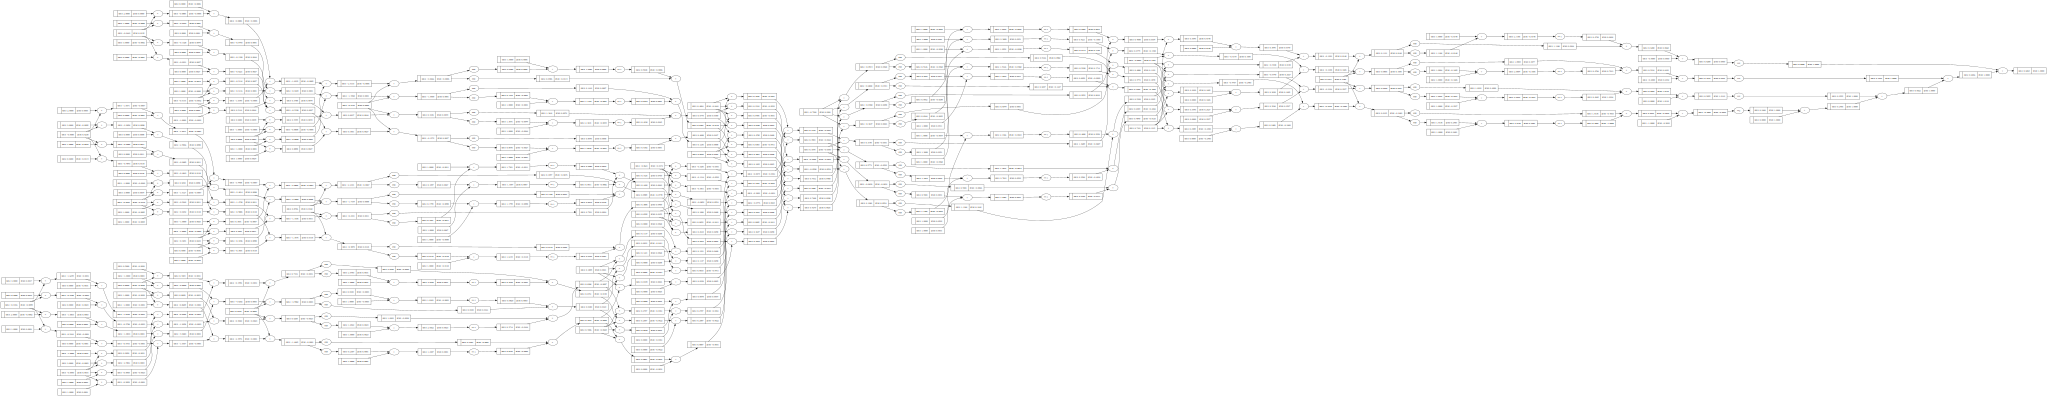

In [14]:
loss.propagar_tudo()
grafo = plota_grafo(loss)
grafo.render("rede_neural", format="png")
grafo

<br>

> ### TREINANDO A REDE ATRAVÉS DA ATUALIZAÇÃO DE PARÂMETROS



> **IMPORTANTE**: Parâmetros são valores da rede neural que você pode mudar. Pensar nos parâmetros dos neurônios é mais fácil do que começar do final, ou seja, do que começar da camada.

Como vimos acima, o grafo computacional da nossa rede neural é bastante complexo! Cheio de vértices!

Nosso objetivo é treinar a rede neural que criamos, sendo que para isso precisamos alterar os parâmetros internos da rede. O primeiro passo para fazer isso é alterar as nossas classes de forma que o código abaixo funcione.



In [15]:
parametros = minha_mlp.parametros()

print(len(parametros))
print()
parametros

23



[Valor(data=-0.5416367621782903),
 Valor(data=-0.9950195461154434),
 Valor(data=0.8608573360967642),
 Valor(data=0.9309908361566941),
 Valor(data=-0.9685432321097929),
 Valor(data=-0.5042227995854454),
 Valor(data=-0.3691181790502931),
 Valor(data=0.8705830301005562),
 Valor(data=-0.04427420752531108),
 Valor(data=-0.5116423479935783),
 Valor(data=0.8898440312120064),
 Valor(data=-0.5132620354910788),
 Valor(data=0.18090655876538442),
 Valor(data=0.6595299750940122),
 Valor(data=0.8292761042553394),
 Valor(data=-0.7926201387902869),
 Valor(data=0.43063363818458056),
 Valor(data=-0.8621246684510733),
 Valor(data=0.40036236177411744),
 Valor(data=0.18696646404409112),
 Valor(data=0.7430926318672295),
 Valor(data=-0.8962031993777684),
 Valor(data=0.24134629166226618)]

> Shocking or not, a nossa função de perda possui 23 dimensões... Isso parece até meio inimaginável.

Agora que conseguimos &ldquo;extrair&rdquo; os parâmetros da nossa MLP, podemos fazer o treino deles! Temos que pensar bem como alterar os parâmetros da maneira correta. Lembre-se que nosso desejo é reduzir a métrica computada pela função de perda.



> Ao rodar essa célula, um ponto no meio da nossa superfície de vinte e três dimensões foi alterado. Se esse ponto foi alterado, os valores de gradientes que conhecíamos mudaram também e aí eles precisariam ser propagados. Nesse sentido, não podemos (teoricamente) rodar as duas células (as duas próximas) ao mesmo tempo.

In [17]:
TAXA_DE_APRENDIZADO = 0.01 # podemos alterar esse valor
for p in minha_mlp.parametros():
    p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

Agora que executamos um &ldquo;ciclo&rdquo; de treino, podemos observar o impacto disso!



In [16]:
y_pred = []
for x_ in x:
    valor_previsto = minha_mlp(x_)
    y_pred.append(valor_previsto)

erros_quadrados = []
for yt, yp in zip(y_true, y_pred):
    erro_quadratico = (yp - yt) ** 2
    erros_quadrados.append(erro_quadratico)

loss = sum(erros_quadrados)
loss.propagar_tudo()
print(loss)

Valor(data=0.606371230934965)


> Aparentemente não mudou nada.

<br>

> ### A DESCIDA DO GRADIENTE



Apenas um &ldquo;ciclo&rdquo; de treino costuma não ser suficiente para treinarmos uma rede neural, precisamos de mais! Antes de seguir em frente, vamos definir um termo: chamamos de `época` toda vez que nossa rede neural propaga *todo* nosso dataset. É comum treinarmos redes neurais por dezenas, centenas e até milhares de épocas!

Vamos programar um treino completo da rede neural!

Um detalhe: sempre temos que zerar os gradientes antes de fazer o backpropagation. Isso é necessário pois cada vez que alteramos os parâmetros estaremos em outra posição da curva de perda e os gradientes antigos já não são mais válidos.



In [ ]:
NUM_DADOS_DE_ENTRADA = 3  # são 3 parâmetros que descrevem cada amostra
NUM_DADOS_DE_SAIDA = 1    # queremos apenas um valor de saída por amostra
CAMADAS_OCULTAS = [3, 2]  # fique à vontade para alterar aqui

x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y_true = [1, 0, 0.2, 0.5]

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]
minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

In [30]:
NUM_EPOCAS = 10 # definição do número de ciclos completos
TAXA_DE_APRENDIZADO = 10 # podemos variar
                            # taxa de aprendizado é o pulo que você dá na superfície
                            # pulos muito grandes não te permitem a fineza de chegar perto do mínimo
        
for epoca in range(NUM_EPOCAS):
    # forward pass
    # dados entra nos neuronios, vai somando, passa por todos eles e camadas
    y_pred = []
    for x_ in x: # colocamos o underline para que um x não sobrescreva o outro
        previsao = minha_mlp(x_)
        y_pred.append(previsao)
    
    # zero grad
    # vamos zerar os gradientes de todas as épocas
    for p in minha_mlp.parametros():
        p.grad = 0 
    
    # loss
    # calcula a perda
    # quadrados mínimos
    loss = []
    for yp, yt in zip(y_pred, y_true):
        loss.append((yp - yt)**2) # vai nos dar uma lista
    loss = sum(loss) # não queremos uma lista, queremos colapsar tudo isso em um número

    # backpropagation
    # já sabemos fazer
    # da perda, se propaga o gradiente local
    loss.propagar_tudo()

    # atualiza parâmetros
    # fizemos aqui mesmo nesse notebook
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO

    # mostra resultado
    # só um print, não faz parte de treinar uma rede
    print(epoca, loss.data)

0 1.408316851263318
1 0.25858068648213606
2 0.21234959191355723
3 0.19447421395325376
4 0.1682996180405287
5 0.14033443540749113
6 0.11655593531578323
7 0.09714735866407302
8 0.2519766585952604
9 0.1781864864851196


In [31]:
print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.8613514523292147), Valor(data=0.023227848025490928), Valor(data=0.026095815980910753), Valor(data=0.8580235586810748)]


Após o treino, podemos checar se nossa rede é capaz de prever os dados que coletamos com boa performance.



In [25]:
print(y_true)
print(y_pred)

[1, 0, 0.2, 0.5]
[Valor(data=0.48254745684244643), Valor(data=0.4802996258830219), Valor(data=0.49712850517738794), Valor(data=0.5063783380955812)]


Esse processo de atualizar os parâmetros da rede neural observando os gradientes locais é chamado de `descida do gradiente` (ou apenas `método do gradiente`).



> Os passos presentes dentro da definição da epoca são os necessários para se criar e treinar qualquer rede neural.

> <hr>

## Conclusão



<div style=' text-align: justify; text-justify: inter-word;'>
    Hoje, preciso começar essa conclusão com um desabafo: eu acho insano (no melhor sentido possível) como tudo o que fazemos aqui são coisas que eu jamais imaginaria que são feitas de tal forma. O processo de traduzir vários processos simples, ao quais já estamos acostumado, como soma, cálculo de gradiente, para uma linguagem que seja clara e eficiente o suficiente para o computador entender e resolver problemas segue me surpreendendo. As ferramentas utilizadas dentro da programação de redes neurais são encantadoras: os inúmeros recursos que os métodos dunder oferecem; os conceitos explorados: neurônios, camadas, épocas é muito interessante. Nesse notebook aqui, chegamos ao ponto final do nosso percurso. Criamos uma rede neural, parte por parte, desde o início e aqui finalizamos ela com todos os elementos necessários e recebendo uma resposta adequada ao que propusemos lá no início. 
   <br> Importante termos a clareza de que, até o momento, nossa rede neural é extremamente simples. Ela faz uma previsão simples e utiliza uma estrutura simples para isso. Não conseguríamos trabalhar com um número muito grande de neurônios aqui. Não estávamos em busca do código mais eficiente do mundo, que resolvesse os problemas mais cabeludos, queriamos somente entender como funciona. No último notebook, o 08, iremos conhecer a biblioteca 'pytorch' que permite desenvolver redes extremamente mais complexas.

<hr>

## Playground



In [ ]:
# lembrar que o nó '+' propaga o gradiente
# minimizar perda é sempre um objetivo > FUNÇÃO DE PERDA costumam ser escrita como minimização
# o gradiente local de cada parametr te conta a direção na qual, se você alterar, haverá aumento a perda
# a função de perda possui vinte e três dimensões
# uma época consiste em rodar todo um ciclo
# para treinar uma rede neural, o número de épocas que você vai rodar depende do problema e dos seus dados
# cada vez que seus dados passam, você altera pesos e vieses para reduzir a perda
# não pensamos em eficiência até aqui, logo, nosso código não permitiria criar uma rede neural super complexa